In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Topological Signal Processing for Predictive Maintenance in Mechanical Systems

<p align="middle">
  <img src="Logo_TU.png" , width ='40%' />
  <img src="m2hycon_logo.png", width ='70%'  /> 
</p>

# Table of contents
* [Business Case](#businesscase)
* [Requirements](#requirements)
* [Delay Embeddings](#delay_embeddings)
* [Topology and Periodicity](#topology_periodicity)
* [Homology](#homology)
* [Persistent Homology](#persistent_homology)
* [TSP Pipeline](#tsp_pipeline)
* [Results](#results)
* [Experiments](#experiments)
    * [Delay Embeddings](#delay_embeddings)
    * [ECT](#ECT)
* [Python libraries](#py_libraries)

# Business Case <a class="anchor" id="businesscase"></a>
* Predictive maintenance of mechanical parts using audio recordings.
* Available Data:

### Time series:

/tmp/ipykernel_3534/2642523977.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, X = scipy.io.wavfile.read(filename)


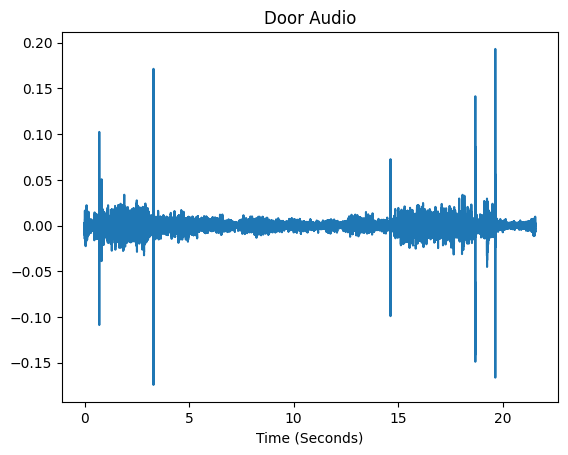

In [5]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from IPython.display import Audio

filename = "/workspaces/tsp/tsp/presentation/test_WTMS001__2021-03-31 22-45-17.wav"
Fs, X = scipy.io.wavfile.read(filename)
plt.figure()
plt.plot(np.arange(len(X))/float(Fs), X)
plt.xlabel("Time (Seconds)")
plt.title("Door Audio")
plt.show()
# load a remote WAV file
Audio(filename)

### Spectrograms:
   <center><img src='spectrogram2d.jpg' width="60%" height="30%"></center> 

### Labels:
- Labels indicate various mechanical failures.
- 2 binary failures $\{0,1\}$.
- 6 continuous labels $[-1,1]$.
- Data set contains 15 unique combinations of failures.

# Requirements <a class="anchor" id="requirements"></a>
- Independence of signal length.
- Generalization to unseen door models.
- As less assumptions about the audio files as possible.
- Robustness to noise.

=> What if we could study the shape of a signal?

# Data Representation <a class="anchor" id="requirements"></a>
* **Delay Embedding** Let $f:[a,b]\subset\mathbb{R}\rightarrow\mathbb{R}$ time series:\begin{align}
    SW_{d,\tau} f:\mathbb{R}&\rightarrow\mathbb{R}^{d}\\
    t&\mapsto (f(t),f(t+\tau),\dotsc,f(t+(d-1)\tau))^T\end{align}
    * $d\in\mathbb{N}_{>0}$ embedding dimension.
    * $\tau\in\mathbb{R}_{>0}$ time-delay parameter.

<center><img src='takens_embedding_gif_v2.gif'></center> 

# Topology and Periodicity

# Periodic Signal
$y(t)=\sin(t)$
<center><img src='sine_wave_embedding.jpg'></center> 
Note: No matter how high the amplitude is or the frequency, the shape of a periodic signal has the type of a circle.

# (Harmonic) Periodic Signal
$y(t)=\sin(3 t)+\sin(t)$
<center><img src='harmonic_sine_wave.jpg'></center> 

<center><img src='sliding_window_intuition.JPG'></center> 
There might be twists in the embedding space, but the sliding window returns to the same point when the period restarts.

### Non-commensurate Signal
$y(t)=\sin(2\sqrt{2}t)+\sin(t)$

<center><img src='non_harmonic_signal.jpg'></center> 

<center><img src='sliding_window_animation_2sqrt2.gif'></center>

- In a non-harmonic signal, the sliding window never travel the same trajectory again over the torus.
- If we had n non-commensurate frequencies, we would have an n dimensional Torus.

### Comparison with Fourier Series
<center><img src='fft_harmonic_vs_noncommensurate.png'></center> 

# Horse

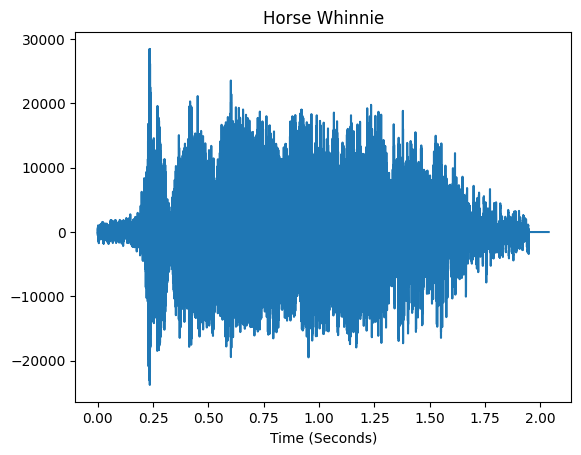

In [6]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from IPython.display import Audio

filename = "/workspaces/tsp/tsp/data/horsewhinnie.wav"
Fs, X = scipy.io.wavfile.read(filename)
plt.figure()
plt.plot(np.arange(len(X))/float(Fs), X)
plt.xlabel("Time (Seconds)")
plt.title("Horse Whinnie")
plt.show()
# load a remote WAV file
Audio(filename)

<center><img src='horse_whinnie.png'></center>

### Noisy Signal

<center><img src='random_embedding.jpg'></center> 

## Decaying Signal

<center><img src='decaying_sine_wave.jpg'></center> 

## Audio Signal

<center><img src='resampled_audio_file_embedding.jpg'></center>

### Chunking Signals

<center><img src='audio_signal_animation.gif'></center>

# Homology

## Simplicial Complex

<center><img src='simplicial_complex.png'></center> 

## Simplicial Homology


$H^k$: vector space spanned by $k$-dimensional holes.

$H^0$ counts connected components -> Clustering. \
$H^1$ counts loops. \
$H^2$ counts voids. 

$\beta_k=dim(H^k)$ Betti number

<center><img src='betti_numbers.png'></center> 

<center><img src='loops.png'></center> 

## Example: Vietoris-Rips Complex
<center><img src='ghrist_barcodes_rips_vietoris_complex2.png'></center> 

# Persistent Homology

<center><img src='rips_growing.gif' width=700 ></center> 

<center><img src='generators_progression1.png'></center>

<center><img src='figure_eight_vietoris_rips.gif'></center>

<center><img src='PD_vs_BC.JPG'></center>

# Noise
<center><img src='denoised_circle.jpg' width="700"></center> 
<center><img src='noisy_circle.jpg' width="700"></center> 

# Event Detection in Audios
<center><img src='persistent_entropy_healthy2.jpg' width = 700></center> 

<center><img src='animation_audio_signal_barcodes.gif'></center>

## Persistent homology on spectrograms
## Cubical Complex
- Image: rectangular grid in $\mathbb{R}^2$.
- Admit a natural representation as a cubical complex.
- Pixels are unit squares $[0,1]^2$ defining the maximal cubes. 
- Two pixels can be disjoint or share a common edge or vertex.
   <center><img src='spectrogram2d.jpg' width="60%" height="30%"></center> 

### Sublevelset Filtration
<center><img src='sublevelset_filtration.jpg' ></center>

### Sublevelset Persistence
<center><img src='cubical_levelset_peristence.jpg'width="60%" height="30%"></center>

# TSP Pipeline <a class="anchor" id="tsp_pipeline"></a>

<center><img src='TSP_PIPELINE.png'></center> 

# Results <a class="anchor" id="results"></a>
| Method                       | Computation time | Dataset size | MAE  | ACC | LODO MAE | LODO ACC |
|------------------------------|------------------|--------------|------|-----|----------|----------|
| PH on delay embeddings       | 0.8s             | 1026         | 0.09 | 0.95| 0.45     | 0.51     |
| PH on spectrograms           | 60s              | 100          | 0.15 | 0.78| -        | -        |

# Drawbacks of persistence diagrams
- Need to vectorize -> loss of information.
- Non-injective.

# ECT <a class="anchor" id="ect"></a>
ECT on spectrograms:
<center><img src='EC_curve2.JPG'></center> 
<center><img src='Betti_Euler.JPG'></center> 


### Results
| Method                       | Computation time | Dataset size | MAE  | ACC | LODO MAE | LODO ACC |
|------------------------------|------------------|--------------|------|-----|----------|----------|
| ECT on spectrograms          | 85s              | 200          | 0.04 | 0.98| 0.25     | 0.88     |

### Discussion
- Independence of signal length. &#9989;
- Generalization to unseen mechanical models. &#128542;
- As less assumptions about the audio files as possible. &#9989;
- Robustness to noise. &#9989;

# Python libraries <a class="anchor" id="py_libraries"></a>
* [Ripser](https://ripser.scikit-tda.org/en/latest/): 
    * Vietories-Rips Persistence homology computation
    * SOTA
* [Bats (Basic Applied Topology Subprograms)](https://bats-tda.readthedocs.io/en/latest/index.html):
    * Only library that implements zigzag Persistence
    * Mathematical style
    * Nice visualizations
* [Giotto TDA](https://giotto-ai.github.io/gtda-docs/0.5.1/library.html):
    * Topological machine learning toolbox built on top of scikit-learn
* [Persim](https://github.com/scikit-tda/persim):
    * Topological descriptors from persistence diagrams, e.g. bottleneck distances, persistence landscapes 
* [Gudhi](https://gudhi.inria.fr/introduction/):
    * Full-stack TDA: Complexes, data structures, geometric and topological inference, analysis tools
* [Teaspoon](https://teaspoontda.github.io/teaspoon/):
    * Topological signal processing library.
    * machine learning, complex networks, information, parameter selection (for delay embeddings), dynamical systems library 

# The End

# Appendix

## Simplicial Complexes <a class="anchor" id="simplicialcomplexes"></a>
* **motivation**: 
    * Build a continuous shape from data to which we can attach topological invariants that summarize its connectivity. 
    * **Example** graphs, topological invariant: Euler characteristic.
    * Simplicial complexes are a generalization to higher dimensions.
* **Simplicial complex**:
    * A set composed of simplices: points, edges, filled triangles and their higher dimensional analogs.
    
<center><img src='simplicial_complex.PNG'></center> 

* Given a set $X$, assume ordering on its vertices $v_0<\dotsc <v_n$:
* **n-simplex**: ordered sequence $\sigma_n:[v_{i_0},\dotsc, v_{i_n}]$ of $n+1$ vertices.
* **Condition**: closure under subset relation:
\begin{equation}
\text{if } \tau\in K \text{ and  } \sigma \subseteq \tau \text{ then } \sigma\in K
\end{equation}
where $K$ is simplicial complex of $X$, $\tau$ an $n+1$-simplex and $\sigma$ an $n$-simplex.

## Simplicial Complexes
* **Question**: how do we attach algebraic invariants to this geometric object?

* **Answer**: Define formal addition and substraction on simplices! 

* $k$-chain: A formal combination of $k$- simplices over $\mathbb{R}$, i.e. of the form 
\begin{align}
\sum_i a_i\sigma_i\\
a_i\in \mathbb{R}\\
\sigma_i: \ k-\text{simplex}
\end{align}
* Set of $k$-chains: Linear space spanned by $k$-simplices over $\mathbb{R}$:
\begin{equation}
C_k(X):=\mathsf{Span}_\mathbb{R}\{ [v_{i_0},\dotsc, v_{i_k}]:0\leq i_0 \leq i_1 \leq \dotsc i_k \leq n\}. \end{equation}


## Simplicial (Co)-homology 

* keeps track of connectivity of a space in every dimension.
* **Question**: How to characterize a hole?
* **Conditions**
    * A hole has no boundary.
    * A hole is not the boundary of anything. 
$\Rightarrow$ construct a boundary operator $\partial$:
* $\partial$hole = 0.
* hole $\notin \partial$chain, $\forall$ chain $\in C$.\
hole $\in\frac{\mathsf{ker}\partial}{\mathsf{im}\partial}$: Boundariless chains that are not boundaries of higher dimensional chains.

## Boundary Operator
\begin{align}
\partial_k: C_k&\rightarrow C_{k-1}\\
\sigma&\mapsto \sum_{i=0}^k(-1)^i[v_0,\dotsc,\hat{v}_i, \dotsc,v_k]
\end{align}
<center><img src='boundary_operator.PNG'></center> 

The chains of $X$ fit in a sequence connected by the boundary operator:
\begin{equation}C_{n+1}\xrightarrow{\partial_{n+1}} C_{n}\xrightarrow{\partial_{n}} \dotsc \xrightarrow{\partial_{2}} C_{1}\xrightarrow{\partial_{1}} C_{0}\xrightarrow{\partial_{0}} \rightarrow 0
\end{equation}
The boundary operator satisfies $\partial_{k}\circ \partial_{k-1}=0$.
* $\mathsf{ker}(\partial_k)$: $k$-cycles.
* $\mathsf{im}(\partial_{k+1})$: $k$-boundaries.

* $k$-th homology: $H^k:=\frac{\mathsf{ker}(\partial_k)}{\mathsf{im}(\partial_{k+1})}$: $k$-cycles that are not $k$-boundaries.

## Persistent (Co)-homology <a class="anchor" id="persistentcohomology"></a>
Given nested inclusions: \begin{equation} X_1\subseteq X_2\subseteq \dotsc \subseteq X_n \end{equation}
we obtain maps in $k$-th homology $H_k$:
\begin{equation} H_k(X_1)\rightarrow H_k(X_2)\rightarrow\dotsc \rightarrow H_k(X_n)\end{equation}

## Sublevelset filtration:
* Function $f:X\rightarrow \mathbb{R}$.
* filtration: $c\mapsto f^{-1}((-\infty,c])=:X_c$
* for $c_1\leq c_2\leq c_3\leq \dotsc \leq c_n$ we obtain a sequence of inclusions \begin{equation}
X_{c_1}\subseteq X_{c_2}\subseteq X_{c_3} \subseteq \dotsc \subseteq X_{c_n}
\end{equation}
which induces a persistent homology in dimension $k$:
\begin{equation}
H_k(X_{c_1})\rightarrow H_k(X_{c_2}) \rightarrow H_k(X_{c_3}) \rightarrow \dotsc \rightarrow H_k(X_{c_n}) 
\end{equation}

## Euler Characteristic Transform (ECT)<a class="anchor" id="ECT"></a>
### Euler Characteristic
Euler Characteristic of an $n$-dim shape $X$ is:
\begin{equation}
\chi=\sum_{i=0}^n (-1)^i \mathsf{dim}(H_i(X)) 
\end{equation}
$\mathsf{dim}(H_i(X))=:\beta_i(X)$, Betti number of $X$ in dimension $i$.
### Euler Curve
\begin{align}
\mathsf{EC}_\nu(X):[a_\nu,b_\nu]&\rightarrow \mathbb{Z}\\
x&\mapsto \chi(X_\nu^x)
\end{align}

<center><img src='EC_curve.JPG'></center> 

## Euler Characteristic Transform (ECT)
* Euler Curve Transform:
\begin{align}
\mathsf{ECT}(X):\mathbb{S}^{d-1}&\rightarrow \mathbb{Z^R}\\
\nu &\mapsto \mathsf{EC}_\nu(X)
\end{align}
* distance:
\begin{equation}
\mathsf{dist^{ECT}}(X_1,X_2):=(\int_{\mathbb{S}^{d-1}}\|\mathsf{EC}_\nu(X_1)-\mathsf{EC}_\nu(X_2)\|^2d\nu)^{1/2}
\end{equation}

* The ECT has a well defined inner product structure.
* The ECT is injective:  $\mathsf{ECT}(X_1)= \mathsf{ECT}(X_2) \Rightarrow X_1=X_2$.
